In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:

img = cv.imread("lena512.png", 0)
# plt.imshow(img, cmap="gray")
# plt.show()

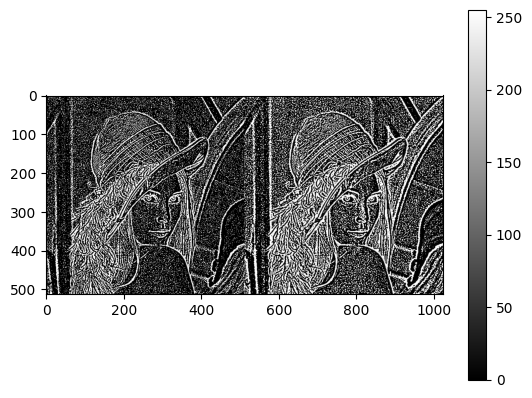

In [3]:
low_sigma = cv.GaussianBlur(img, (3, 3), 0)
high_sigma = cv.GaussianBlur(img, (5, 5), 0)
higher_sigma = cv.GaussianBlur(img, (7, 7), 0)

DoG = low_sigma - high_sigma
DoGger = low_sigma - higher_sigma
plt.imshow(np.hstack([DoG, DoGger]), cmap="gray")
plt.colorbar()
plt.show()

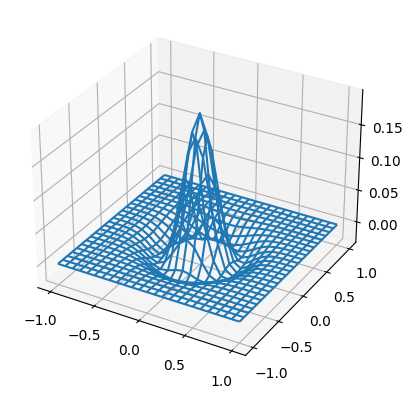

In [8]:
x = np.linspace(-1, 1, 25)
y = np.linspace(-1, 1, 25)
xx, yy = np.meshgrid(x, y)

s1 = 5
s2 = 1.6 * s1
g1 = 1/(np.sqrt(2*np.pi*(s1**2))) * (np.exp(-(xx*xx + yy*yy)/2*(s1**2)))
g2 = 1/(np.sqrt(2*np.pi*(s2**2))) * (np.exp(-(xx*xx + yy*yy)/2*(s2**2)))
d = g1 - g2

kernel = np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1],[0, -1, -2, -1, 0], [0, 0, -1, 0, 0]])

laplace = cv.filter2D(g1, ddepth=-1, kernel=kernel)
filtered = cv.filter2D(img, ddepth=-1, kernel=laplace)

fig = plt.figure()
ax = plt.axes(projection="3d")
# ax.plot_surface(xx, yy, g1)
# ax.plot_surface(xx, yy, g2)
ax.plot_wireframe(xx, yy, laplace)

# plt.plot(x, g1, label='g1')
# plt.plot(x, g2, label='g2')
# plt.plot(x, d, label='d')
# plt.legend()
# plt.imshow(filtered, "gray")
plt.show()

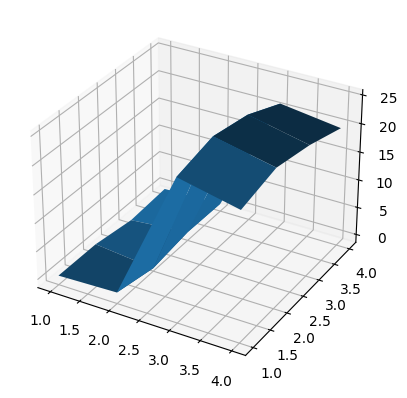

In [5]:
image = 255 * np.hstack([np.zeros((4, 2)), np.ones((4, 2))])
noise = np.random.normal(0, 5, image.shape)
image += noise
x = np.linspace(1, 4, 4)
y = np.linspace(1, 4, 4)
xx, yy = np.meshgrid(x, y)
sigma_r = 0.05
sigma_s = 4
gaussian_s = 1/(np.sqrt(2*np.pi*(sigma_s**2))) * (np.exp(-((xx-2)**2 + ((yy-2)**2))/(2*sigma_s**2)))
some = image * gaussian_s
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(xx, yy, some)
plt.show()